In [23]:
import json
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

In [200]:
with open('export_mitigation.json', 'r') as f:
    data = json.load(f)

In [2]:
features = []
for app in data:
    features.extend(app['features'])

feature_counts = Counter(features)

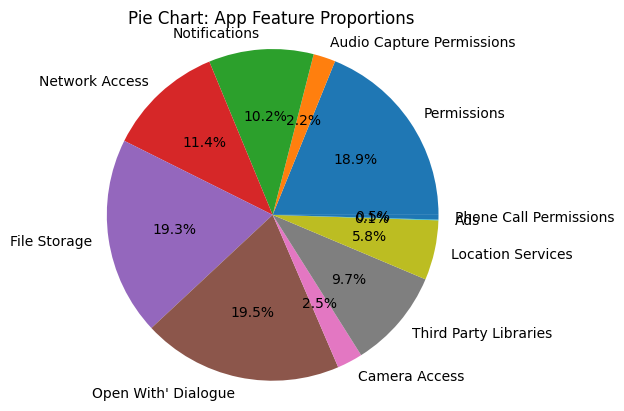

In [32]:
labels = feature_counts.keys()
sizes = feature_counts.values()

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Pie Chart: App Feature Proportions')

plt.savefig('pie_app_feature_proportions.png', dpi=300, bbox_inches='tight')

plt.show()

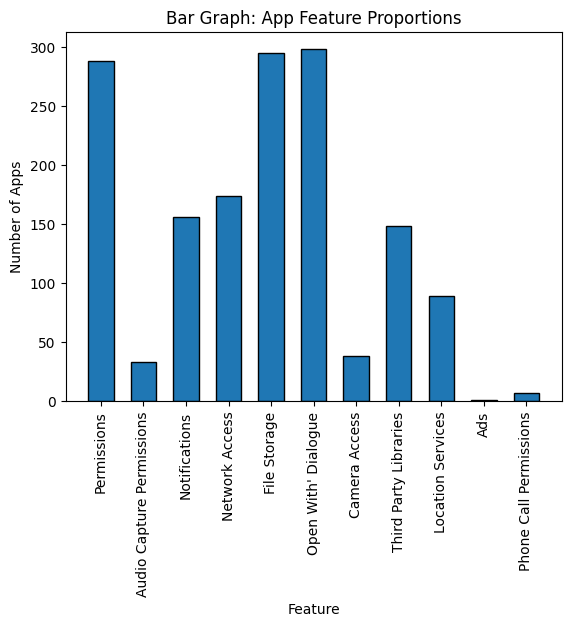

In [33]:
# Create a bar chart of the feature counts
labels = list(feature_counts.keys())
values = list(feature_counts.values())
plt.bar(labels, values, width=0.6, edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Number of Apps')
plt.title('Bar Graph: App Feature Proportions')

plt.savefig('bar_app_feature_proportions.png', dpi=300, bbox_inches='tight')

plt.show()

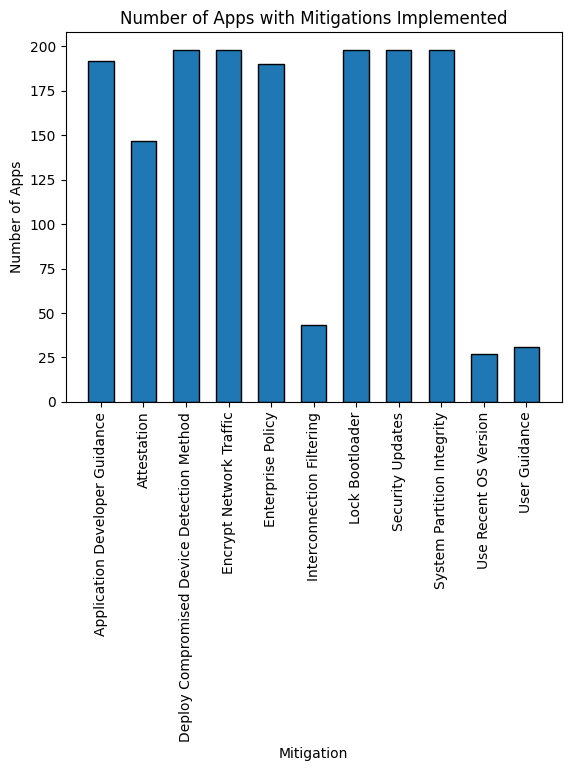

In [35]:
# Count the number of apps that have implemented each mitigation
mitigations_count = defaultdict(int)
for app in data:
    mitigations = app['mitigations']
    if isinstance(mitigations, list):
        continue  # skip apps with no mitigations
    for mitigation, value in mitigations.items():
        if value == 0: # Value of 0 means no attack techniques found by Virus Total - infer relevant mitigation implemented
            mitigations_count[mitigation] += 1

# Create a bar chart of the mitigations count
labels = list(mitigations_count.keys())
values = list(mitigations_count.values())
plt.bar(labels, values, width=0.6, edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel('Mitigation')
plt.ylabel('Number of Apps')
plt.title('Number of Apps with Mitigations Implemented')

plt.savefig('num_mitigated_apps.png', dpi=300, bbox_inches='tight')

plt.show()

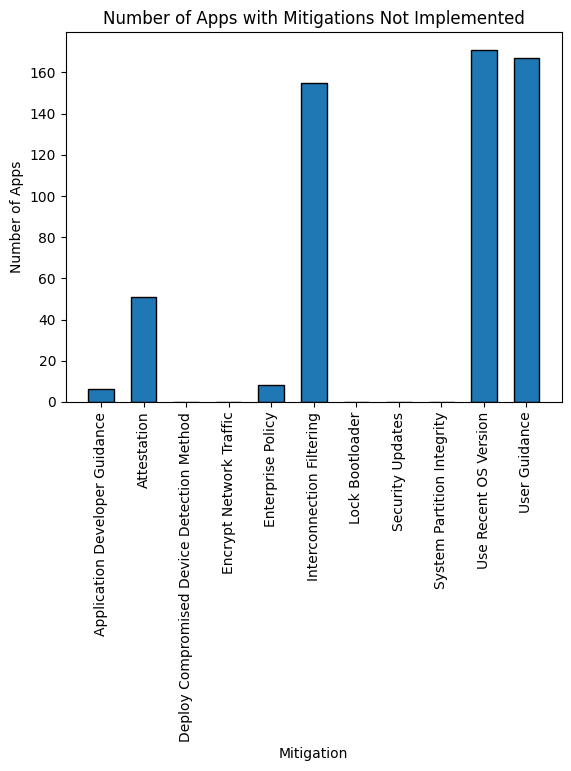

In [36]:
# Count the number of apps that have implemented each mitigation
mitigations_count = defaultdict(int)
for app in data:
    mitigations = app['mitigations']
    if isinstance(mitigations, list):
        continue  # skip apps with no mitigations
    for mitigation, value in mitigations.items():
        mitigations_count[mitigation] += (value > 0) 
        # Value greater than 0 means attack techniques have been found by Virus Total - infer relevant mitigation not implemented

# Create a bar chart of the mitigations count
labels = list(mitigations_count.keys())
values = list(mitigations_count.values())
plt.bar(labels, values, width=0.6, edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel('Mitigation')
plt.ylabel('Number of Apps')
plt.title('Number of Apps with Mitigations Not Implemented')

plt.savefig('num_non_mitigated_apps.png', dpi=300, bbox_inches='tight')

plt.show()

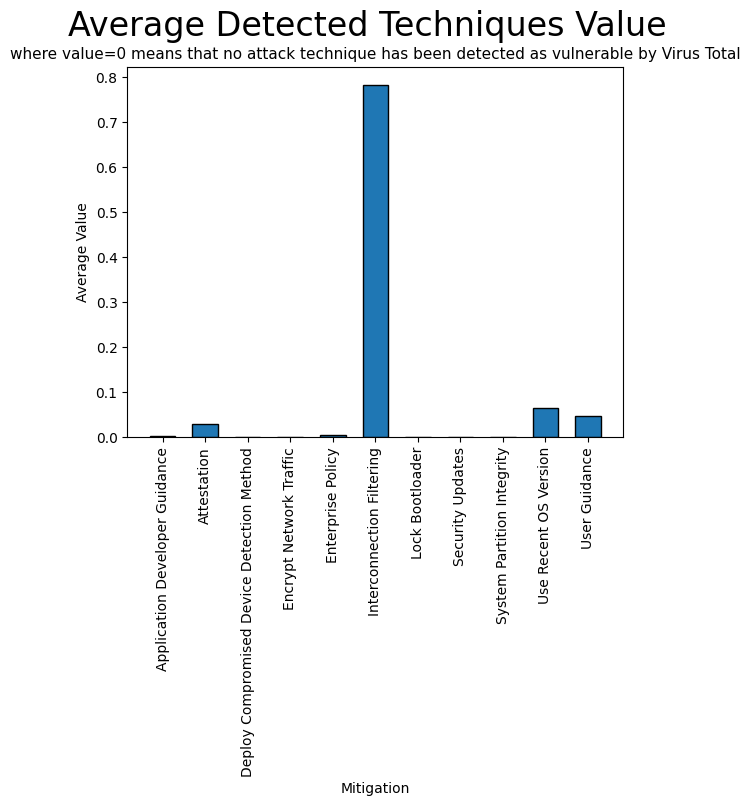

In [134]:
# Calculate the average value of each mitigation
mitigations_count = defaultdict(list)
for app in data:
    mitigations = app['mitigations']
    if isinstance(mitigations, list):
        continue  # skip apps with no mitigations
    for mitigation, value in mitigations.items():
        mitigations_count[mitigation].append(value)

# Calculate the average value for each mitigation
mitigations_avg = {mitigation: sum(values) / len(values) for mitigation, values in mitigations_count.items()}

# Create a bar chart of the mitigations average value
labels = list(mitigations_avg.keys())
values = list(mitigations_avg.values())
plt.bar(labels, values, width=0.6, edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel('Mitigation')
plt.ylabel('Average Value')
plt.suptitle('Average Detected Techniques Value',fontsize=24, y=1)
plt.title('where value=0 means that no attack technique has been detected as vulnerable by Virus Total',fontsize=11)

plt.savefig('avg_detected_techniques_value.png', dpi=300, bbox_inches='tight')

plt.show()

In [89]:
with open('data.json') as f:
    recommendations = json.load(f)

In [331]:
def get_recommended_mitigations(features):
    feature_map = {
        'Permissions': 'permissions',
        'Audio Capture Permissions': 'audioCapturePermissions',
        'Notifications': 'notifications',
        'Network Access': 'networkAccess',
        'File Storage': 'fileStorage',
        'Open With\' Dialogue': 'openWithDialogue',
        'Camera Access': 'cameraAccess',
        'Forum Posts / Comments': 'forumPosts_Comments',
        'Login': 'login',
        'Password Recovery': 'passwordRecovery',
        'Text Input': 'textInput',
        'Search': 'search',
        'Ads': 'ads',
        'Data Collection': 'dataCollection',
        'Location Services': 'locationServices',
        'Payment Options': 'paymentOptions',
        'Third Party Libraries': 'thirdPartyLibraries',
        'Phone Call Permissions': 'phoneCallPermissions',
        'General Device Security': 'generalDeviceSecurity'
    }

    mitigations = {}
    for recommendation in recommendations:
        rec_features = [feature_map.get(feat, feat) for feat in recommendation['features']]
        if any(feature_map.get(feature, feature) in rec_features for feature in features):
            mitigations[recommendation['mitigation']] = recommendation['degree']
#             mitigations[recommendation['mitigation']] = recommendation['degree'] * len(set(features) & set(rec_features))
    return mitigations


# Generate the dataset
def generate_recommended_dataset(data):
    dataset = []
    for app in data:
        recommended_mitigations = get_recommended_mitigations(app['features'])
        datapoint = {
            'app_name': app['app_name'],
            'features': app['features'],
            'mitigations': recommended_mitigations
        }
        dataset.append(datapoint)
    return dataset


dataset = generate_recommended_dataset(data)
# print(dataset)

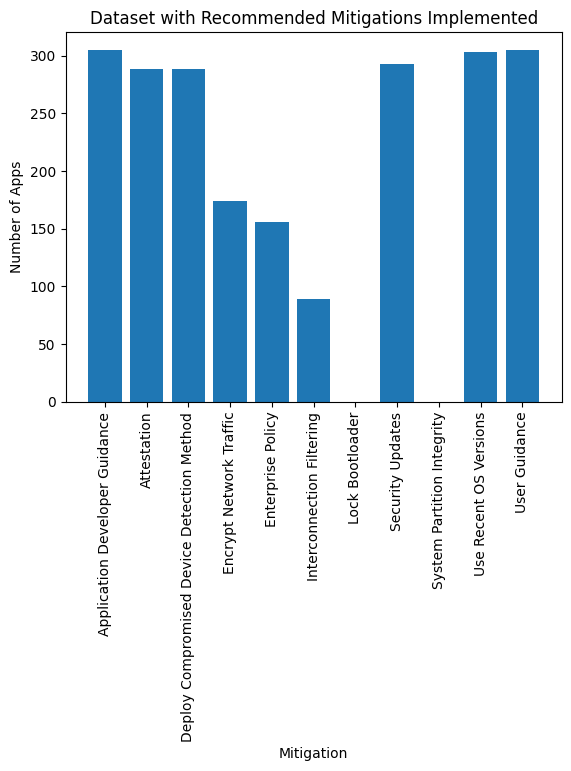

In [192]:
# initialise a dictionary to store the count of each mitigation in the desired custom order
mitigation_count = {
    'Application Developer Guidance': 0, 
    'Attestation': 0, 
    'Deploy Compromised Device Detection Method': 0, 
    'Encrypt Network Traffic': 0, 
    'Enterprise Policy': 0, 
    'Interconnection Filtering': 0, 
    'Lock Bootloader': 0, 'Security Updates': 0, 
    'System Partition Integrity': 0, 
    'Use Recent OS Versions': 0, 
    'User Guidance': 0
}

# dataset = [{'app_name': 'SmartCookieWeb', 'features': ['Permissions', 'Audio Capture Permissions', 'Notifications', 'Network Access', 'File Storage', "Open With' Dialogue", 'Camera Access'], 'mitigations': {'Security Updates': 0.11864406779661017, 'Application Developer Guidance': 0.3389830508474576, 'Use Recent OS Versions': 1.0, 'Attestation': 0.0, 'Deploy Compromised Device Detection Method': 0.0, 'Enterprise Policy': 0.5932203389830508, 'User Guidance': 0.7966101694915253, 'Encrypt Network Traffic': 0.06779661016949151}}]
# iterate over the dataset and count the implementation of each mitigation
for app in dataset:
#     print(app['app_name'])
    mitigations = app['mitigations']
#     print(mitigations)
    for mitigation, count in mitigations.items():
        if mitigation in mitigation_count:
#             print(count)
            mitigation_count[mitigation] += 1
#             print(mitigation_count[mitigation])

# create a list of mitigation names and their corresponding count, in the desired custom order
mitigations = ['Application Developer Guidance', 'Attestation', 'Deploy Compromised Device Detection Method', 'Encrypt Network Traffic', 'Enterprise Policy', 'Interconnection Filtering', 'Lock Bootloader', 'Security Updates', 'System Partition Integrity', 'Use Recent OS Versions', 'User Guidance']
counts = [mitigation_count[mitigation] for mitigation in mitigations]

# plot the bar chart
plt.bar(mitigations, counts)
plt.xticks(rotation=90)
plt.title('Dataset with Recommended Mitigations Implemented')
plt.xlabel('Mitigation')
plt.ylabel('Number of Apps')
plt.show()

In [187]:
# Mitigations and their corresponding priority levels
mitigations_priority = {
    'Attestation': 'Low',
    'Deploy Compromised Device Detection Method': 'Low',
    'Encrypt Network Traffic': 'Low',
    'Interconnection Filtering': 'Low',
    'Security Updates': 'Medium',
    'Application Developer Guidance': 'Medium',
    'Enterprise Policy': 'Medium',
    'Use Recent OS Versions': 'High',
    'User Guidance': 'High'
}

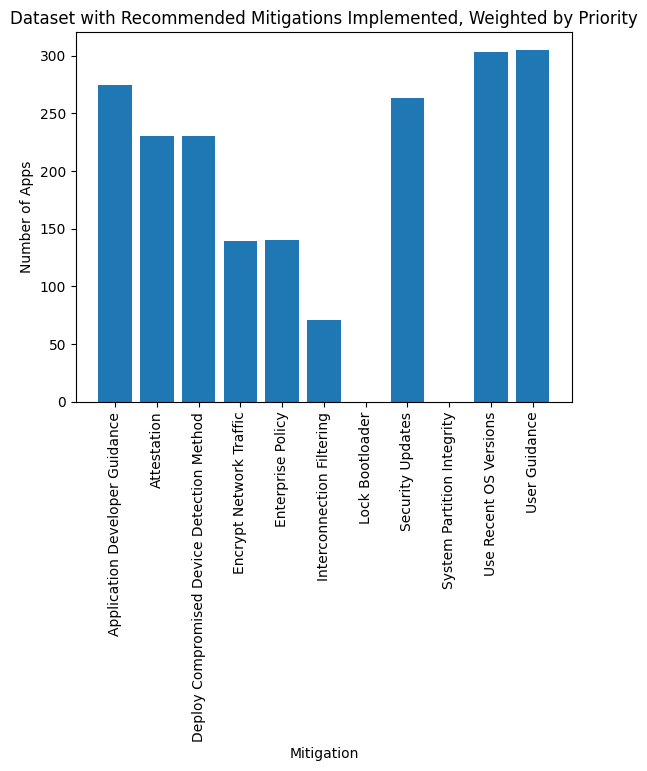

In [194]:
# initialise a dictionary to store the count of each mitigation in the desired custom order
mitigation_count = {
    'Application Developer Guidance': 0, 
    'Attestation': 0, 
    'Deploy Compromised Device Detection Method': 0, 
    'Encrypt Network Traffic': 0, 
    'Enterprise Policy': 0, 
    'Interconnection Filtering': 0, 
    'Lock Bootloader': 0, 'Security Updates': 0, 
    'System Partition Integrity': 0, 
    'Use Recent OS Versions': 0, 
    'User Guidance': 0
}

# Define the priority weights for each level
priority_weights = {
    'Low': 0.8,
    'Medium': 0.9,
    'High': 1.0
}

# iterate over the dataset and count the implementation of each mitigation
for app in dataset:
    mitigations = app['mitigations']
    for mitigation, count in mitigations.items():
        if mitigation in mitigation_count:
            mitigation_count[mitigation] += priority_weights[mitigations_priority[mitigation]]

# create a list of mitigation names and their corresponding count, in the desired custom order
mitigations = ['Application Developer Guidance', 'Attestation', 'Deploy Compromised Device Detection Method', 'Encrypt Network Traffic', 'Enterprise Policy', 'Interconnection Filtering', 'Lock Bootloader', 'Security Updates', 'System Partition Integrity', 'Use Recent OS Versions', 'User Guidance']
counts = [mitigation_count[mitigation] for mitigation in mitigations]

# plot the bar chart
plt.bar(mitigations, counts)
plt.xticks(rotation=90)
plt.title('Dataset with Recommended Mitigations Implemented, Weighted by Priority')
plt.xlabel('Mitigation')
plt.ylabel('Number of Apps')
plt.show()

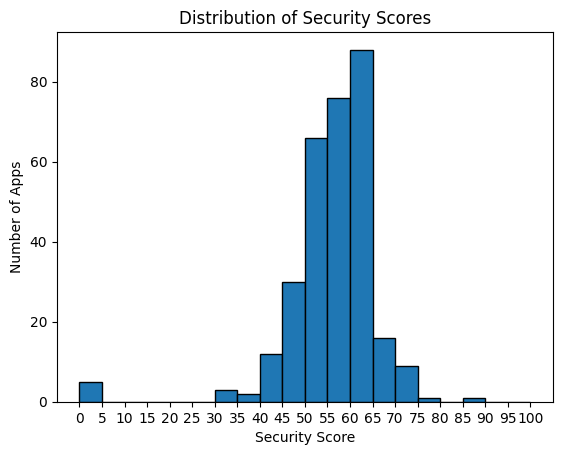

In [211]:
# Extract the security scores
security_scores = [app.get("security_score", 0) for app in data]

# Define the bins and histogram range
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

# Plot the histogram
plt.hist(security_scores, bins=bins, edgecolor='black')

# Set the x-axis labels and title
plt.xlabel("Security Score")
plt.ylabel("Number of Apps")
plt.title("Distribution of Security Scores")

# Set the x-axis tick labels
plt.xticks(bins)

# Display the histogram
plt.show()


In [330]:
# # Threshold for security_score to split the apps
# threshold = 60

# # Separate apps into secure and non-secure based on the security_score threshold
# secure_apps = [app for app in data if app.get("security_score", 0) >= threshold]
# non_secure_apps = [app for app in data if app.get("security_score", 0) < threshold]

# # Save secure_apps to 'secure_apps.json'
# with open('secure_apps.json', 'w') as f:
#     json.dump(secure_apps, f, indent=4)

# # Save non_secure_apps to 'non_secure_apps.json'
# with open('non_secure_apps.json', 'w') as f:
#     json.dump(non_secure_apps, f, indent=4)

# # Print the number of apps in each file
# print(f"Number of secure apps: {len(secure_apps)}")
# print(f"Number of non-secure apps: {len(non_secure_apps)}")

In [329]:
# # Implemented mitigations of secure apps

# with open('secure_apps.json', 'r') as f:
#     secure_app_data = json.load(f)

# # Count the number of apps that have implemented each mitigation
# mitigations_count = defaultdict(int)
# for app in secure_app_data:
#     mitigations = app['mitigations']
#     if isinstance(mitigations, list):
#         continue  # skip apps with no mitigations
#     for mitigation, value in mitigations.items():
#         if value == 0: # Value of 0 means no attack techniques found by Virus Total - infer relevant mitigation implemented
#             mitigations_count[mitigation] += 1

# # Create a bar chart of the mitigations count
# labels = list(mitigations_count.keys())
# values = list(mitigations_count.values())
# plt.bar(labels, values, width=0.6, edgecolor='black')
# plt.xticks(rotation=90)
# plt.xlabel('Mitigation')
# plt.ylabel('Number of Apps')
# plt.title('Mitigations Implemented in Secure Apps')

# # plt.savefig('num_mitigated_apps.png', dpi=300, bbox_inches='tight')

# plt.show()

In [328]:
# # initialise a dictionary to store the count of each mitigation in the desired custom order
# mitigation_count = {
#     'Application Developer Guidance': 0, 
#     'Attestation': 0, 
#     'Deploy Compromised Device Detection Method': 0, 
#     'Encrypt Network Traffic': 0, 
#     'Enterprise Policy': 0, 
#     'Interconnection Filtering': 0, 
#     'Lock Bootloader': 0, 'Security Updates': 0, 
#     'System Partition Integrity': 0, 
#     'Use Recent OS Versions': 0, 
#     'User Guidance': 0
# }

# # iterate over the dataset and count the implementation of each mitigation
# for app in secure_app_data:
#     mitigations = app['mitigations']
#     if not mitigations:  # Skip apps with no mitigations
#         continue
#     for mitigation in mitigations:
#         for mitigation_name in mitigation_count:
#             if mitigation_name in mitigation:
#                 mitigation_count[mitigation_name] += 1
#                 break

# # create a list of mitigation names and their corresponding count, in the desired custom order
# mitigations = ['Application Developer Guidance', 'Attestation', 'Deploy Compromised Device Detection Method', 'Encrypt Network Traffic', 'Enterprise Policy', 'Interconnection Filtering', 'Lock Bootloader', 'Security Updates', 'System Partition Integrity', 'Use Recent OS Versions', 'User Guidance']
# counts = [mitigation_count[mitigation] for mitigation in mitigations]

# # plot the bar chart
# plt.bar(mitigations, counts)
# plt.xticks(rotation=90)
# plt.title('Secure Apps with Recommended Mitigations Implemented')
# plt.xlabel('Mitigation')
# plt.ylabel('Number of Apps')
# plt.show()

In [327]:
# # Implemented mitigations of secure apps

# with open('non_secure_apps.json', 'r') as f:
#     non_secure_app_data = json.load(f)

# # Count the number of apps that have implemented each mitigation
# mitigations_count = defaultdict(int)
# for app in non_secure_app_data:
#     mitigations = app['mitigations']
#     if isinstance(mitigations, list):
#         continue  # skip apps with no mitigations
#     for mitigation, value in mitigations.items():
#         if value == 0: # Value of 0 means no attack techniques found by Virus Total - infer relevant mitigation implemented
#             mitigations_count[mitigation] += 1

# # Create a bar chart of the mitigations count
# labels = list(mitigations_count.keys())
# values = list(mitigations_count.values())
# plt.bar(labels, values, width=0.6, edgecolor='black')
# plt.xticks(rotation=90)
# plt.xlabel('Mitigation')
# plt.ylabel('Number of Apps')
# plt.title('Mitigations Implemented in Non-Secure Apps')

# # plt.savefig('num_mitigated_apps.png', dpi=300, bbox_inches='tight')

# plt.show()

In [226]:
# Thresholds for security scores
fully_secure_threshold = 70
pretty_secure_threshold = 60

# Separate apps into different security categories based on the security_score threshold
fully_secure_apps = [app for app in data if app.get("security_score", 0) >= fully_secure_threshold]
pretty_secure_apps = [app for app in data if pretty_secure_threshold <= app.get("security_score", 0) < fully_secure_threshold]
not_secure_apps = [app for app in data if app.get("security_score", 0) < pretty_secure_threshold]

# Save apps to respective JSON files
with open('fully_secure_apps.json', 'w') as f:
    json.dump(fully_secure_apps, f, indent=4)

with open('pretty_secure_apps.json', 'w') as f:
    json.dump(pretty_secure_apps, f, indent=4)

with open('not_secure_apps.json', 'w') as f:
    json.dump(not_secure_apps, f, indent=4)

# Print the number of apps in each category
print(f"Number of fully secure apps: {len(fully_secure_apps)}")
print(f"Number of pretty secure apps: {len(pretty_secure_apps)}")
print(f"Number of not as secure apps: {len(not_secure_apps)}")

Number of fully secure apps: 11
Number of pretty secure apps: 104
Number of not as secure apps: 194


In [326]:
with open('fully_secure_apps.json', 'r') as f:
    fully_secure_apps = json.load(f)
    
fully_secure_recommendation = generate_recommended_dataset(fully_secure_apps)

In [313]:
# Normalize the data using min-max scaling
def min_max_scaling(data):
    min_val = min(data)
    max_val = max(data)
    scaled_data = [(x - min_val) / (max_val - min_val) for x in data]
    return scaled_data

In [342]:
def generate_bidirectional_chart(app_json, recommendation_json, title_type, filename):
    # Define the y labels
    y_labels = [
        "System Partition Integrity",
        "Lock Bootloader",
        "Deploy Compromised Device Detection Method",
        "Attestation",
        "Interconnection Filtering",
        "Encrypt Network Traffic",
        "Security Updates",
        "Application Developer Guidance",
        "Enterprise Policy",
    ]

    # Calculate the values for implemented and non-implemented
    implemented_data = []
    non_implemented_data = []

    for mitigation in y_labels:
        implemented_count = sum(1 for app in app_json if mitigation in app['mitigations'] and app['mitigations'][mitigation] == 0.0)
        implemented_data.append(implemented_count)

        non_implemented_data_value = sum(1 for app in recommendation_json if mitigation in app['mitigations']) - implemented_count
        if non_implemented_data_value < 0:
            non_implemented_data.append(0)
        else:
            non_implemented_data.append(non_implemented_data_value)

    implemented_data_normalized = min_max_scaling(implemented_data)
    non_implemented_data_normalized = min_max_scaling(non_implemented_data)

    # Create an array of x values for the y labels
    x = np.arange(len(y_labels))

    # Set the width of the bars
    bar_width = 0.35

    # Create the bidirectional bar chart
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot implemented_data
    ax.barh(x, implemented_data_normalized, bar_width, align='center', label='Implemented')

    # Plot non_implemented_data with negative values to create the bidirectional effect
    ax.barh(x, [-val for val in non_implemented_data_normalized], bar_width, align='center', label='Recommended but not implemented')

    # Set y-axis ticks and labels
    ax.set_yticks(x)
    ax.set_yticklabels(y_labels)

    # Set x-axis label and title
    ax.set_xlabel('Normalised Value')
    ax.set_title(title_type + ': proportion of implemented vs non-implemented apps for recommended mitigations')

    # Add text annotations for implemented_data
    for i, val in enumerate(implemented_data_normalized):
        total = val + non_implemented_data_normalized[i]
        percentage = val / total * 100
        ax.text(val, i, f'{percentage:.1f}%', va='center', ha='left')

    # Add text annotations for non_implemented_data
    for i, val in enumerate(non_implemented_data_normalized):
        total = implemented_data_normalized[i] + val
        percentage = val / total * 100
        ax.text(-val, i, f'{percentage:.1f}%', va='center', ha='right')

    # Move the legend below the graph and make it wider
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize='large', bbox_transform=ax.transAxes)

    # Adjust the x-axis limits with padding
    ax.set_xlim(-max(non_implemented_data_normalized) * 1.3, max(implemented_data_normalized) * 1.3)

    plt.savefig(filename + '_bi_directional.png', dpi=300, bbox_inches='tight')

    # Display the bidirectional bar chart
    plt.show()

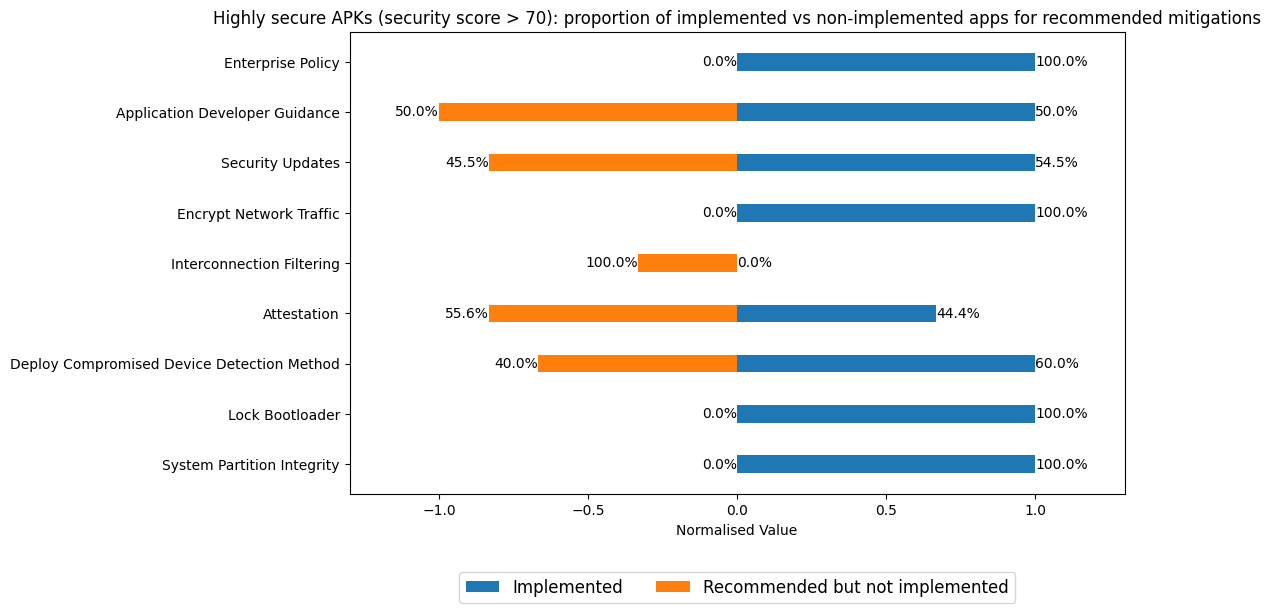

In [343]:
generate_bidirectional_chart(fully_secure_apps, fully_secure_recommendation, 'Highly secure APKs (security score > 70)', 'fully_secure')

In [325]:
with open('pretty_secure_apps.json', 'r') as f:
    pretty_secure_apps = json.load(f)
    
pretty_secure_recommendation = generate_recommended_dataset(pretty_secure_apps)

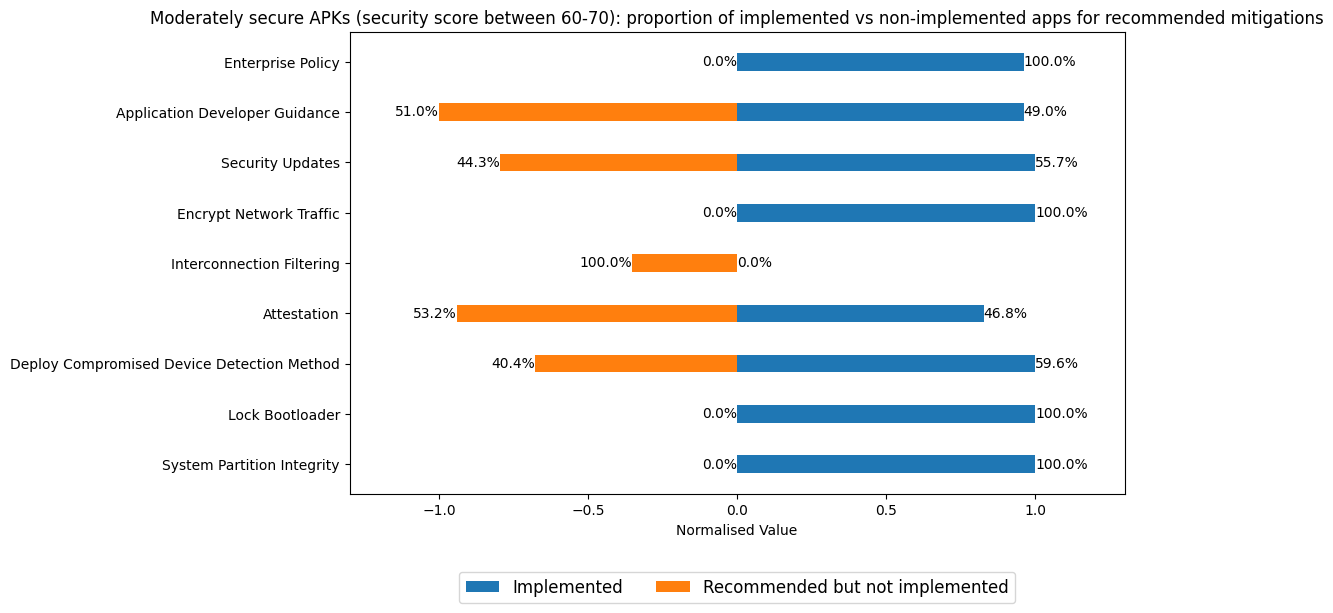

In [344]:
generate_bidirectional_chart(pretty_secure_apps, pretty_secure_recommendation, 'Moderately secure APKs (security score between 60-70)', 'pretty_secure')

In [297]:
with open('not_secure_apps.json', 'r') as f:
    not_secure_apps = json.load(f)
    
not_secure_recommendations = generate_recommended_dataset(not_secure_apps)

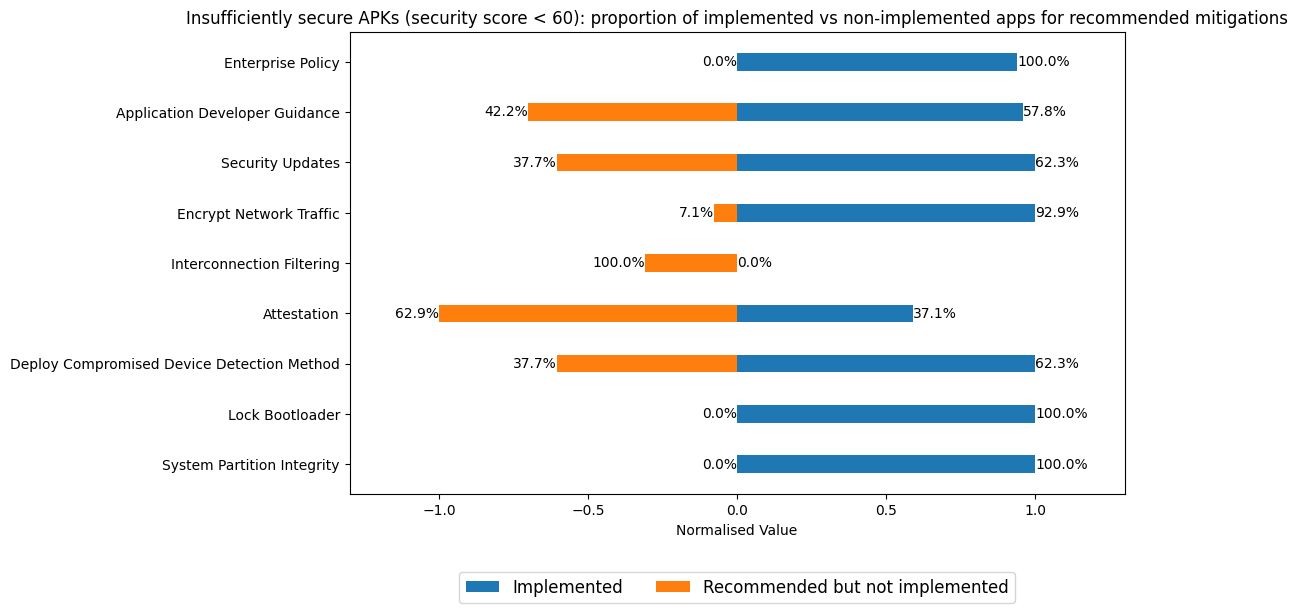

In [345]:
generate_bidirectional_chart(not_secure_apps, not_secure_recommendations, 'Insufficiently secure APKs (security score < 60)', 'not_secure')

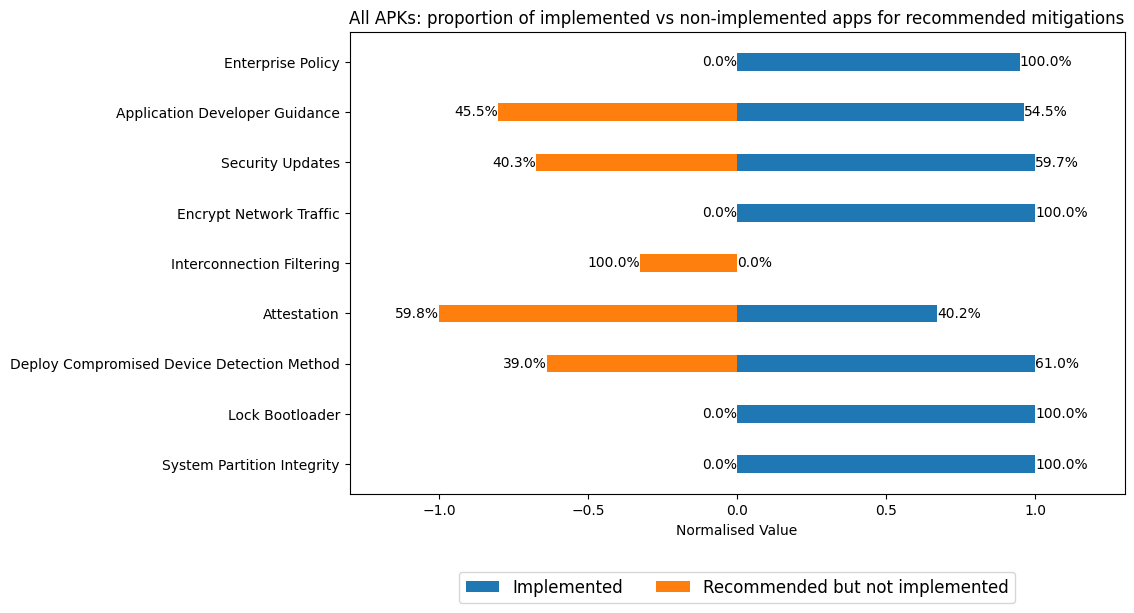

In [346]:
all_recommendations = generate_recommended_dataset(data)
generate_bidirectional_chart(data, all_recommendations, 'All APKs', 'all')